In [1]:
path = 'F:/Traders/2x4/Adjusted CME Futures/Switch_OI'

In [2]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(path) if isfile(join(path, f))]

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Adj_close           
close               
close	Adj_close	open	Adj_open	high	Adj_high	low	Adj_low	volume	openInterest


In [4]:

f = 'Lumber.csv'
full_name = str(path+'/'+f)
idx = pd.DatetimeIndex(pd.DataFrame(pd.read_csv(full_name,index_col=0)).index).strftime('%Y-%m-%d')
futures_df = pd.DataFrame(index=idx)

In [5]:
col_name = 'Adj_close'

for f in files:
    full_name = str(path+'/'+f)    
    df = pd.DataFrame(pd.read_csv(full_name,index_col=0)[col_name])
    name = f[:f.rfind('.')]
    df = df.rename(columns={col_name: name})    
    futures_df = pd.concat([futures_df,df],axis=1).reindex(futures_df.index)

In [6]:
futures_df.head()

,1-Month Eurodollar,1-Month SOFR,3-Month BSBY,3-Month Eurodollar,3-Month SOFR,3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread (1000mt) Futures,3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread Futures,Adjusted Interest Rate FTSE-100 Total Return Index Futures,Adjusted Interest Rate S&P 500 Total Return Index Futures,AEP-Dayton Hub Daily Electricity Futures - Peak,...,USD_JPY Micro,USD_offshore RMB,USD_ZAR,Western Canadian Select Oil (NE2) Monthly Index Futures,WTI Crude Oil Calendar Spreads,WTI Houston (Argus) vs. WTI Financial Futures,WTI Houston (Argus) vs. WTI Trade Month Futures,WTI Midland (Argus) vs. WTI Trade Month Futures,WTS (Argus) Financial Futures,WTS (Argus) vs. WTI Financial Futures
dt,,,,,,,,,,,,,,,,,,,,,
2022-05-10,99.085,99.2825,98.2450,98.5250,99.4900,-14.925,-14.925,7297.57,8410.72,95.0,...,130.28,6.7524,16.1486,-12.816,NaN,1.64,1.40,1.03,NaN,NaN
2022-05-09,99.070,99.2775,98.2775,98.5275,99.4925,-15.141,-15.141,7270.90,8389.37,112.5,...,130.17,6.7552,16.2206,-13.071,NaN,1.63,1.40,0.97,NaN,NaN
2022-05-06,99.050,99.2775,98.2650,98.5025,99.4925,-14.781,-14.781,7444.16,8667.09,112.5,...,130.45,6.7151,16.0321,-12.816,NaN,1.62,1.37,0.99,NaN,NaN
2022-05-05,99.030,99.2750,98.2450,98.4900,99.4875,-14.272,-14.272,7560.84,8715.67,81.9,...,130.25,6.6919,16.0707,-12.743,NaN,1.56,1.32,0.93,NaN,NaN
2022-05-04,99.030,99.2750,98.3250,98.4950,99.4900,-13.420,-13.420,7550.86,9038.33,141.0,...,128.60,6.6153,15.5400,-12.578,NaN,1.55,1.30,0.89,NaN,NaN


In [7]:
# Cut off any period prior to 2010
cut_off_date = pd.to_datetime('2014-01-01').strftime('%Y-%m-%d')
futures_df = futures_df[futures_df.index > cut_off_date]

In [8]:
futures_df.tail()

,1-Month Eurodollar,1-Month SOFR,3-Month BSBY,3-Month Eurodollar,3-Month SOFR,3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread (1000mt) Futures,3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread Futures,Adjusted Interest Rate FTSE-100 Total Return Index Futures,Adjusted Interest Rate S&P 500 Total Return Index Futures,AEP-Dayton Hub Daily Electricity Futures - Peak,...,USD_JPY Micro,USD_offshore RMB,USD_ZAR,Western Canadian Select Oil (NE2) Monthly Index Futures,WTI Crude Oil Calendar Spreads,WTI Houston (Argus) vs. WTI Financial Futures,WTI Houston (Argus) vs. WTI Trade Month Futures,WTI Midland (Argus) vs. WTI Trade Month Futures,WTS (Argus) Financial Futures,WTS (Argus) vs. WTI Financial Futures
dt,,,,,,,,,,,,,,,,,,,,,
2014-01-08,99.8375,NaN,0.2646,99.7575,303.9,-18.470,-18.470,NaN,NaN,45.90,...,NaN,7.240033,16.312586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,99.8325,NaN,0.2661,99.7575,303.9,-18.140,-18.140,NaN,NaN,212.89,...,NaN,7.240393,16.164425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,99.8325,NaN,0.2659,99.7575,303.9,-17.660,-17.660,NaN,NaN,70.04,...,NaN,7.245547,16.104191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,99.8325,NaN,0.2659,99.7550,303.9,-19.653,-19.653,NaN,NaN,NaN,...,NaN,7.252260,16.125682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,99.8300,NaN,0.2661,99.7525,303.9,-19.653,-19.653,NaN,NaN,31.56,...,NaN,7.248544,16.199081,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pd.set_option('display.max_rows', 500)
fut_desc = futures_df.describe().T
fut_desc.head()

,count,mean,std,min,25%,50%,75%,max
1-Month Eurodollar,2092.0,99.127146,0.818989,97.4750,98.419375,99.521250,99.840000,99.9254
1-Month SOFR,1012.0,98.961293,0.995728,97.5200,98.007500,99.252584,99.947500,99.9925
3-Month BSBY,1768.0,9.686080,29.113069,0.0896,0.210175,0.235000,0.257625,99.9075
3-Month Eurodollar,2105.0,98.878028,0.626196,97.6450,98.229538,98.920432,99.375000,99.7800
3-Month SOFR,1464.0,200.975890,102.540022,97.5325,99.457596,99.970000,303.900000,303.9000


In [10]:
max_rows = fut_desc['count'].max()
max_rows

2105.0

In [11]:
final_list = fut_desc[fut_desc['count'] == max_rows].index.tolist()
print(len(final_list),'\n',final_list)

33 
 ['3-Month Eurodollar', 'AUD_USD Micro', 'Australian Dollar', 'British Pound', 'CAD_USD Micro', 'CHF_USD Micro', 'CME Cocoa', 'CME Coffee', 'Crude Oil WTI Mini', 'E-Mini Nikkei Yen', 'Euro FX', 'EUR_USD Micro', 'EUR_USD Mini', 'Feeder Cattle', 'GBP_USD Micro', 'Gulf Sour Crude Oil', 'Japanese Yen', 'JPY_USD Mini', 'Lean Hogs (Pit)', 'Lean Hogs', 'Lumber', 'Mexican Peso', 'Natural Gas LDay (F)', 'Natural Gas Mini', 'Natural Gas', 'New Zealand Dollar', 'Nikkei 225', 'Palladium', 'Platinum', 'S&P GSCI', 'South African Rand', 'ULSD NY Harbor Mini', 'USD_ZAR']


In [12]:
final_df = futures_df[final_list]
final_df.head()

,3-Month Eurodollar,AUD_USD Micro,Australian Dollar,British Pound,CAD_USD Micro,CHF_USD Micro,CME Cocoa,CME Coffee,Crude Oil WTI Mini,E-Mini Nikkei Yen,...,Natural Gas Mini,Natural Gas,New Zealand Dollar,Nikkei 225,Palladium,Platinum,S&P GSCI,South African Rand,ULSD NY Harbor Mini,USD_ZAR
dt,,,,,,,,,,,,,,,,,,,,,
2022-05-10,98.5250,0.6944,0.69420,1.2314,0.7676,1.0062,2445.0,2.0380,99.76,26110.0,...,7.385,7.385,0.62895,26130.0,2042.0,953.5,729.75,0.061925,3.9322,16.1486
2022-05-09,98.5275,0.6961,0.69585,1.2344,0.7698,1.0088,2455.0,2.0610,103.09,25980.0,...,7.026,7.026,0.63300,26005.0,2059.8,938.5,737.85,0.061650,3.8349,16.2206
2022-05-06,98.5025,0.7079,0.70760,1.2332,0.7747,1.0138,2492.0,2.1045,109.77,26890.0,...,8.043,8.043,0.64065,26910.0,2021.2,954.6,770.55,0.062375,3.9543,16.0321
2022-05-05,98.4900,0.7096,0.70930,1.2350,0.7777,1.0141,2511.0,2.1725,108.26,26740.0,...,8.783,8.783,0.64060,26755.0,2175.3,971.8,778.10,0.062225,4.0413,16.0707
2022-05-04,98.4950,0.7237,0.72340,1.2577,0.7842,1.0281,2580.0,2.2080,107.81,27430.0,...,8.415,8.415,0.65115,27455.0,2233.3,978.2,770.20,0.064350,4.1970,15.5400


In [13]:
lumber_df = pd.DataFrame(final_df['Lumber'])
lumber_df.dropna(inplace=True)
final_df.drop(['Lumber'],axis=1,inplace=True)
final_df.dropna(inplace=True)

C:\Users\Fanjum_cwp\AppData\Local\Temp\2\ipykernel_13460\946656033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(['Lumber'],axis=1,inplace=True)
C:\Users\Fanjum_cwp\AppData\Local\Temp\2\ipykernel_13460\946656033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


# UnCorrelated with Lumber

In [14]:

# final_correlated_list = []
# cut_off_correlation = 0.10
# for asset in final_df.columns:
#     if(abs(np.corrcoef(final_df[asset],lumber_df['Lumber'])[0][1]) < cut_off_correlation):
#         final_correlated_list.append(asset)


# print(len(final_correlated_list))


# final_df = final_df[final_correlated_list]




In [15]:
final_df_ln = np.log(final_df) - np.log(final_df.shift(-1))
final_df_ln.dropna(inplace=True)
lumber_df_ln = np.log(lumber_df) - np.log(lumber_df.shift(-1))
lumber_df_ln.dropna(inplace=True)
# final_df_ln.head(3)

\\VSYS-P-GW01.cloud.vsys.ca\RDFolderRedirect$\fanjum_cwp\Desktop\Python\2x4\venv\Lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [16]:

x = StandardScaler().fit_transform(final_df_ln)
y = StandardScaler().fit_transform(lumber_df_ln)
Target = pd.DataFrame(['+ve' if i > 0 else '-ve' if i < 0 else '0' for i in lumber_df_ln['Lumber'].values])

In [17]:
Target


,0
0,+ve
1,+ve
2,-ve
3,+ve
4,-ve
...,...
2099,+ve
2100,+ve
2101,+ve
2102,-ve


In [18]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [19]:
finalDf = pd.concat([principalDf, Target], axis = 1)
finalDf.columns = ['principal component 1', 'principal component 2','principal component 3', 'Target']
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,Target
0,1.134337,-0.740921,1.563139,+ve
1,5.278751,5.672800,-4.647285,+ve
2,1.089807,1.225426,-3.967427,-ve
3,9.387057,-1.841376,3.565708,+ve
4,-7.755615,0.012833,2.584880,-ve


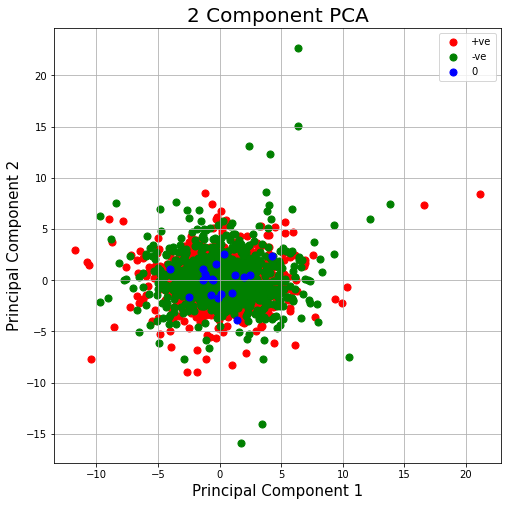

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['+ve', '-ve', '0']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

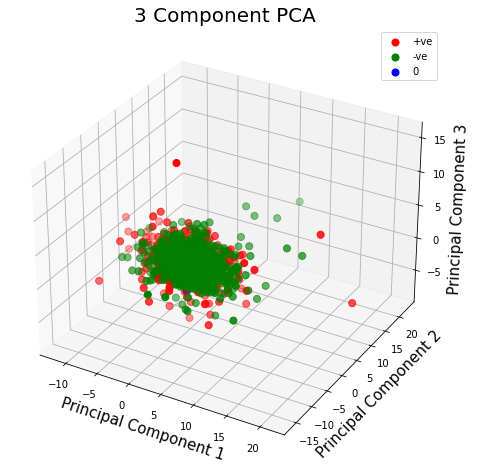

In [21]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)

targets = ['+ve', '-ve', '0']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter3D(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], finalDf.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
ax.legend(targets)
ax.grid()


In [25]:
finalDf['principal component 1'].dropna()

0       1.134337
1       5.278751
2       1.089807
3       9.387057
4      -7.755615
          ...   
2097    0.855019
2098    1.420994
2099    1.443092
2100   -0.169262
2101   -1.505977
Name: principal component 1, Length: 2102, dtype: float64

In [47]:
lumber_df.pct_change(-1).reset_index().drop('dt',axis=1)

,Lumber
0,0.012884
1,0.008899
2,-0.019510
3,0.009901
4,-0.028379
...,...
2100,0.005082
2101,0.006250
2102,-0.013453
2103,0.009907


In [52]:
pd.concat([lumber_df.pct_change(-1).reset_index().drop('dt',axis=1),finalDf['principal component 1'].dropna()],axis=1).dropna().corr()

,Lumber,principal component 1
Lumber,1.000000,-0.041752
principal component 1,-0.041752,1.000000


In [53]:
pd.concat([lumber_df.pct_change(-1).reset_index().drop('dt',axis=1),finalDf['principal component 2'].dropna()],axis=1).dropna().corr()

,Lumber,principal component 2
Lumber,1.000000,-0.056591
principal component 2,-0.056591,1.000000


In [54]:
pd.concat([lumber_df.pct_change(-1).reset_index().drop('dt',axis=1),finalDf['principal component 3'].dropna()],axis=1).dropna().corr()

,Lumber,principal component 3
Lumber,1.000000,0.006828
principal component 3,0.006828,1.000000


In [46]:
0.044997*100

4.4997